In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [356]:
########################################################################
#read in data
df = pd.read_csv("march_mad_data_expanded.csv")
########################################################################
### CREATE ROUND OF 32
#list of teams
round_of_32 = ['Abilene Christian','Alabama','Arkansas','Baylor','Colorado','Creighton','Florida',
               'Florida State','Gonzaga','Houston','Illinois','Iowa','Kansas','Louisiana State','Loyola (IL)',
               'Maryland','Michigan','North Texas','Oklahoma','Oklahoma State','Ohio','Oral Roberts',
               'Oregon','Oregon State','Rutgers','Southern California','Syracuse','Texas Tech','UCLA','Villanova','West Virginia','Wisconsin']

# create a new column 'Round32' and set all values to 'No'
df['Round32'] = 'No'

# set the value of 'Round32' to 'Yes' for the teams in the Round32
df.loc[df['School'].isin(round_of_32), 'Round32'] = 'Yes'

########################################################################
##### Make a singular column that shows how far a team progressed.

# Define the columns to check
check_columns = ['Tournament','Round32','Sweet16', 'Elite8', 'Final4','Final2','Champion']

# Create a list to store the results
results = []

# Create a list comprehension to generate the results
results = [next((col for col in check_columns[::-1] if row[col] == 'Yes'), 'None') for _, row in df.iterrows()]

# Add the results to the DataFrame as a new column
df['progression'] = results
#df.loc[df['School'] == 'Houston']

#remove the other columns, so the values in 'progression' don't get confused with the columns
df = df.drop(['Tournament', 'Round32', 'Sweet16', 'Elite8', 'Final4', 'Final2', 'Champion'], axis=1)

########################################################################
#make sure it's category
df['progression'] = df['progression'].astype('category')
########################################################################

# make new df without Nones (maybe gonna use this, maybe not)
new_df = df.loc[df['progression'] != 'None']

,Rank,Tournament,School,G,W,L,W-L%,SRS,SOS,Unnamed: 9,...,TOV,PF,AST/game,Sweet16,Elite8,Final4,Final2,Champion,TOV/game,Round32
0,1,Yes,Abilene Christian,29,24,5,0.828,6.27,-6.37,NaN,...,394.0,554.0,17.689655,No,No,No,No,No,13.6,Yes
1,2,No,Air Force,25,5,20,0.200,-12.98,0.22,NaN,...,361.0,415.0,12.320000,No,No,No,No,No,14.4,No
2,3,No,Akron,23,15,8,0.652,1.85,-1.96,NaN,...,271.0,413.0,13.260870,No,No,No,No,No,11.8,No
3,4,Yes,Alabama,33,26,7,0.788,19.58,10.01,NaN,...,458.0,603.0,14.060606,Yes,No,No,No,No,13.9,Yes
4,5,No,Alabama A&M,15,6,9,0.400,-18.86,-14.99,NaN,...,229.0,272.0,10.933333,No,No,No,No,No,15.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,351,No,Wright State,24,18,6,0.750,6.89,-7.65,NaN,...,314.0,328.0,15.375000,No,No,No,No,No,13.1,No
351,352,No,Wyoming,25,14,11,0.560,-1.23,-2.31,NaN,...,281.0,468.0,14.040000,No,No,No,No,No,11.2,No
352,353,No,Xavier,21,13,8,0.619,11.09,6.47,NaN,...,235.0,325.0,17.571429,No,No,No,No,No,11.2,No
353,354,No,Yale,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,No,No,No,No,NaN,No


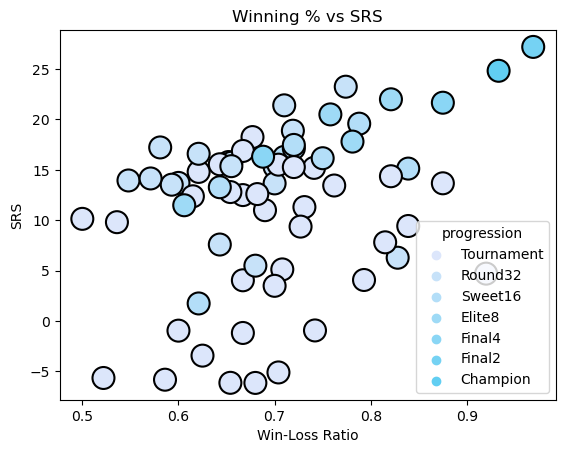

/var/folders/6c/6_yvphyn6jx_slx7qlbq1ngm0000gn/T/ipykernel_10879/1748692526.py:37: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



In [330]:
### same but w/ new_df
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color map
color_map = {'Tournament': '#DCE6FB', 'Round32': '#C7E2F9', 
             'Sweet16': '#B3DEF8', 'Elite8': '#9EDAF6', 'Final4': '#8AD6F5', 
             'Final2': '#75D2F3', 'Champion': '#61CEF2'}

# Set the order of the legend
legend_order = ['Tournament', 'Round32', 'Sweet16', 'Elite8', 'Final4', 'Final2', 'Champion']
############################################################

#size_map = {'Tournament': 50, 'Round32': 75, 
  #          'Sweet16': 100, 'Elite8': 125, 'Final4': 150, 
   #         'Final2': 175, 'Champion': 200}

# Create a new column in your DataFrame that maps progression to size values
#new_df['size'] = new_df['progression'].map(size_map)

############################################################


# Create the scatter plot
#sns.scatterplot(data=new_df, x='W-L%', y='SRS', hue='progression', palette=color_map, hue_order=legend_order, size='size', edgecolor='grey', linewidth=1)

sns.scatterplot(data=new_df, x='W-L%', y='SRS', hue='progression', palette=color_map, hue_order=legend_order,s=250,edgecolor='black', linewidth=1.5)

# Set the title and axis labels
plt.title('Winning % vs SRS')
plt.xlabel('Win-Loss Ratio')
plt.ylabel('SRS')

# Show the plot
plt.show()

fig.show()

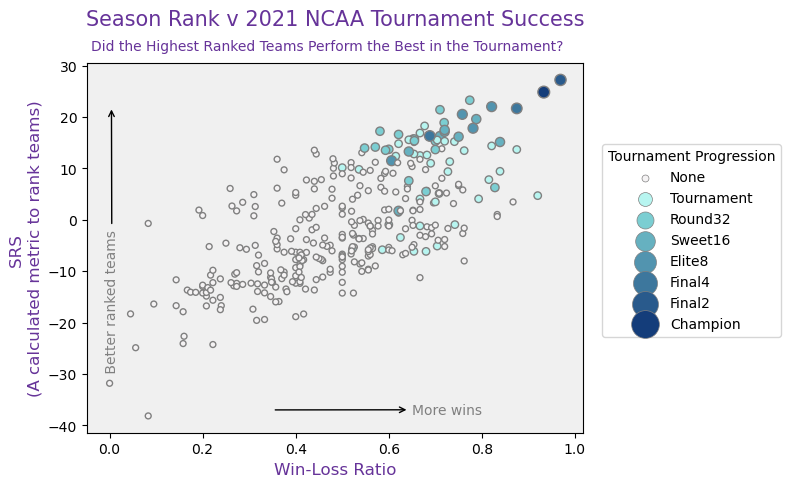

In [629]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color map
#color_map = {'None': '#f5f3f4', 'Tournament': '#F3F0AE', 'Round32': 'pink', 
 #            'Sweet16': '#EEA445', 'Elite8': '#EA8C5A', 'Final4': '#E57370', 
 #           'Final2': '#E15A85', 'Champion': '#DC419B'}


color_map = {'None': '#f5f3f4', 'Tournament': '#B7F5F0', 'Round32': '#7BCED2', 
             'Sweet16': '#66B1C0', 'Elite8': '#5294AF', 'Final4': '#3D779D', 
            'Final2': '#295A8C', 'Champion': '#143D7A'}

#'Tournament': '#F7D61A',
#'None': '#F3F0AE'

#color_map = {'None': '#F0EAFC', 'Tournament': '#DCE6FB', 'Now32': '#C7E2F9', 
#             'Sweet16': '#B3DEF8', 'Elite8': '#9EDAF6', 'Final4': '#8AD6F5', 
#             'Final2': '#75D2F3', 'Champion': '#61CEF2'}

#set sizes

size_map = {'None': 25, 'Tournament': 100, 'Round32': 150, 
            'Sweet16': 200, 'Elite8': 250, 'Final4': 300, 'Final2': 350, 'Champion': 400}

# Create a new column in your DataFrame that maps progression to size values
df['size'] = df['progression'].map(size_map)
df['size'] = df['size'].astype(int)


# Set the order of the legend
legend_order = ['None', 'Tournament', 'Round32', 'Sweet16', 'Elite8', 'Final4', 'Final2', 'Champion']


# Map the hue categories to the corresponding size values
#sizes = [size_map[hue] for hue in df['progression']]

# Create the scatter plot with sizes based on the hue category
ax=sns.scatterplot(data=df, x='W-L%', y='SRS', hue='progression', palette=color_map, hue_order=legend_order, size='size', edgecolor='grey', linewidth=1)




# Set the title and axis labels
#plt.title('Did the Highest Ranked Teams Perform the Best in the Tournament?',size=15,y=1.08,color='rebeccapurple')
plt.title('Season Rank v 2021 NCAA Tournament Success',size=15,y=1.08,color='rebeccapurple')
plt.xlabel('Win-Loss Ratio',size=12,color='rebeccapurple')
plt.ylabel('SRS \n(A calculated metric to rank teams)',size=12,color='rebeccapurple')
#plt.suptitle('(SRS: A calculated metric to rank teams)',size=10,y=.93,color='rebeccapurple')
plt.suptitle('Did the Highest Ranked Teams Perform the Best in the Tournament?',size=10,y=.93,color='rebeccapurple')



# Create the handles and labels for the legend
handles = [plt.scatter([], [], s=size_map[label], color=color_map[label], edgecolor='grey', linewidth=.5) for label in legend_order]
labels = legend_order

# Add the legend to the plot
plt.legend(handles=handles, labels=labels, title='Tournament Progression',bbox_to_anchor=(1.025, .8), loc='upper left')

# Set the background color of the graph to light gray
ax.set_facecolor('#F0F0F0')


plt.annotate("More wins", color="grey", xy=(0.35, -37), xytext=(0.65, -37.75),
             arrowprops=dict(facecolor='black', arrowstyle='<-'))

# add arrow for "higher ranking"
plt.annotate(" Better ranked teams", color='grey',xy=(0.004, 22), xytext=(-0.01, -30),
             arrowprops=dict(facecolor='black', arrowstyle='->'),rotation=90)



# Show the plot
plt.show()

#fig.show()

# Save the plot as a PNG file
fig = ax.get_figure()
fig.savefig('srs_final1.png', dpi=300, bbox_inches='tight')

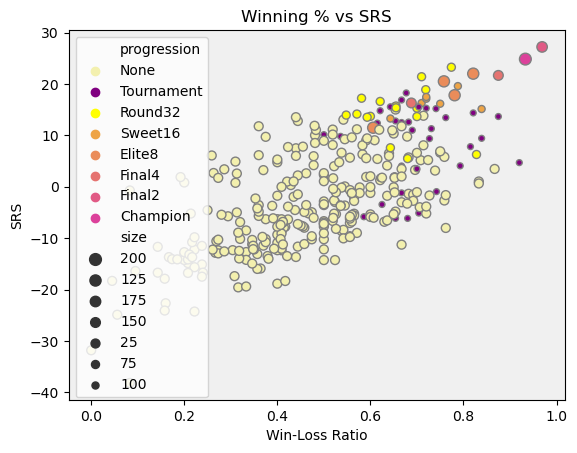

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color map
color_map = {'None': '#F3F0AE', 'Tournament': 'purple', 'Round32': 'yellow', 
             'Sweet16': '#EEA445', 'Elite8': '#EA8C5A', 'Final4': '#E57370', 
            'Final2': '#E15A85', 'Champion': '#DC419B'}

# Set sizes
size_map = {'None': 25, 'Tournament': 50, 'Round32': 75, 
            'Sweet16': 100, 'Elite8': 125, 'Final4': 150, 'Final2': 175, 'Champion': 200}

# Create a new column in your DataFrame that maps progression to size values
df['size'] = df['progression'].map(size_map)

# Set the order of the legend
legend_order = ['None', 'Tournament', 'Round32', 'Sweet16', 'Elite8', 'Final4', 'Final2', 'Champion']

# Create the scatter plot with sizes based on the hue category
ax = sns.scatterplot(data=df, x='W-L%', y='SRS', hue='progression', palette=color_map, hue_order=legend_order, size='size', edgecolor='grey', linewidth=1)

# Set the title and axis labels
ax.set_title('Winning % vs SRS')
ax.set_xlabel('Win-Loss Ratio')
ax.set_ylabel('SRS')

# Remove the size key from the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:-1], labels=labels[:-1])

# Set the background color of the graph to light gray
ax.set_facecolor('#F0F0F0')

# Show the plot
plt.show()




In [372]:
# Boolean indexing to show rows where size != 25
df[df['size'] != 25]
df.dtypes
df['size'] = df['size'].astype(int)
df.dtypes


Rank              int64
School           object
G                 int64
W                 int64
L                 int64
W-L%            float64
SRS             float64
SOS             float64
Unnamed: 9      float64
W.1             float64
L.1             float64
Unnamed: 12     float64
W.2             float64
L.2             float64
Unnamed: 15     float64
W.3             float64
L.3             float64
Unnamed: 18     float64
Tm.             float64
Opp.            float64
Unnamed: 21     float64
MP              float64
FG              float64
FGA             float64
FG%             float64
3P              float64
3PA             float64
3P%             float64
FT              float64
FTA             float64
FT%             float64
ORB             float64
TRB             float64
AST             float64
STL             float64
BLK             float64
TOV             float64
PF              float64
AST/game        float64
TOV/game        float64
progression    category
size            

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      #C7E2F9
1          NaN
2          NaN
3      #B3DEF8
4          NaN
        ...   
350        NaN
351        NaN
352        NaN
353        NaN
354        NaN
Name: progression, Length: 355, dtype: object

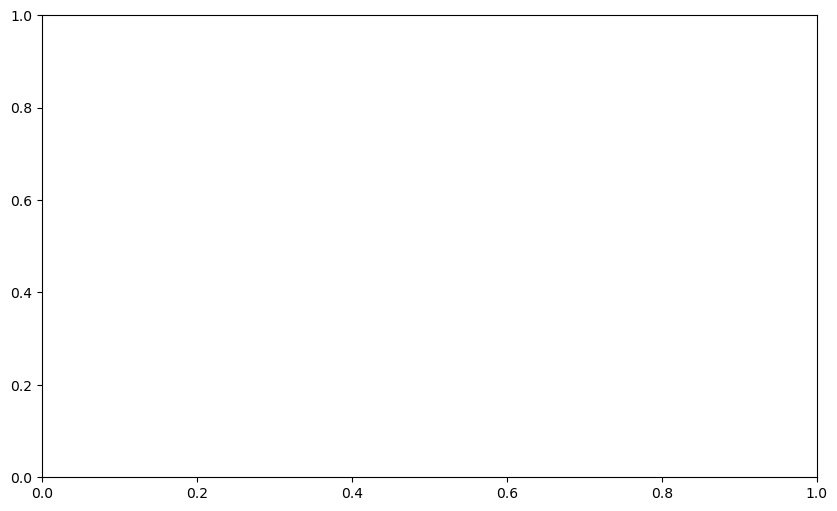

In [338]:
import pandas as pd
import matplotlib.pyplot as plt


# Define color map
color_map = {'None':'#F0EAFC','Tournament':'#DCE6FB','Round32':'#C7E2F9','Sweet16':'#B3DEF8',
             "Elite8":'#9EDAF6','Final4':'#8AD6F5','Final2':'#75D2F3','Champion':'#61CEF2'} 

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['W-L%'], df['SRS'], c=df['progression'].map(color_map),
                     s=100, edgecolor='black', linewidth=1.5)

# Customize plot
ax.set_xlabel('Win-Loss Ratio')
ax.set_ylabel('SRS')
ax.set_title('Winning % vs SRS')
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create custom legend
handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
legend = ax.legend(handles, ['None', 'Tournament', 'Round32', 'Sweet16', 'Elite8', 'Final4', 'Final2', 'Champion'],
                   loc='upper left', title='Progression', frameon=False)

plt.show()


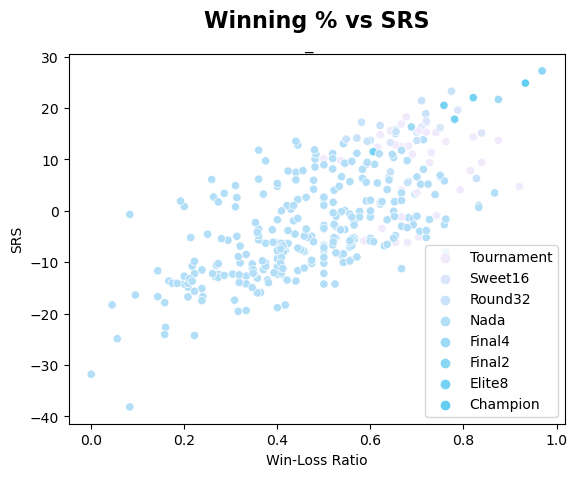

In [176]:
# Set the order of the legend
legend_order = ['None', 'Tournament', 'Round32', 'Sweet16', 'Elite8', 'Final4', 'Final2', 'Champion']

# Define a color map
color_map = {'None': '#F0EAFC', 'Tournament': '#DCE6FB', 'Round32': '#C7E2F9', 
             'Sweet16': '#B3DEF8', 'Elite8': '#9EDAF6', 'Final4': '#8AD6F5', 
             'Final2': '#75D2F3', 'Champion': '#61CEF2'}

# Create the scatterplot
sns.scatterplot(x='W-L%', y='SRS', hue='progression', data=df,
                palette=['#61CEF2','#75D2F3','#8AD6F5','#9EDAF6','#B3DEF8','#C7E2F9','#DCE6FB','#F0EAFC'],hue_order=legend_order)
#normal way ['#F0EAFC','#DCE6FB','#C7E2F9','#B3DEF8','#9EDAF6','#8AD6F5','#75D2F3','#61CEF2']
#['#DCE6FB','#B3DEF8','#F0EAFC','#C7E2F9','#9EDAF6','#61CEF2','#75D2F3','#8AD6F5']


# Add axis labels and title
plt.xlabel('Win-Loss Ratio')
plt.ylabel('SRS')
plt.suptitle('_',y=.915)
plt.title('Winning % vs SRS', fontsize=16, fontweight='bold',y=1.05)
plt.legend(title='Tournament Status and Round Reached', loc='best')

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
# specify order
order = [7,6,5,4,3,2,1,0]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])

fig.show()

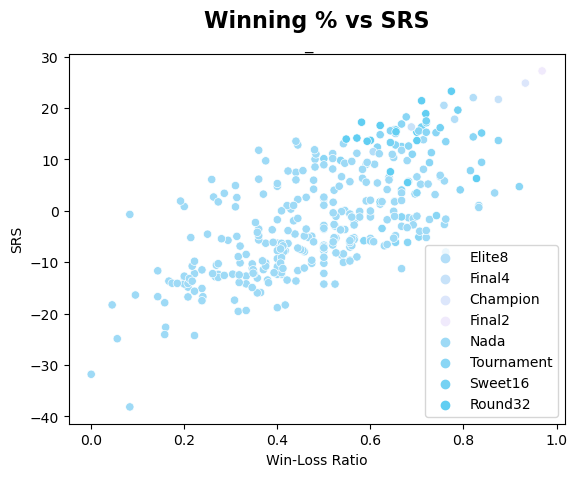

In [109]:
# Select the rows where 'SOS' and 'W-L%' are not NaN and sort by 'SOS' and 'W-L%'
#sorted_sos = df[['SRS', 'W-L%', 'School', 'Tournament']].dropna().sort_values('SRS', ascending=False).iloc[:6]
#sorted_wl = df[['SRS', 'W-L%', 'School', 'Tournament']].dropna().sort_values('W-L%', ascending=False).iloc[:6]

# Create the scatterplot
sns.scatterplot(x='W-L%', y='SRS', hue='progression', data=df,
                palette=['#DCE6FB','#B3DEF8','#F0EAFC','#C7E2F9','#9EDAF6','#61CEF2','#75D2F3','#8AD6F5'])
#['#F0EAFC','#DCE6FB','#C7E2F9','#B3DEF8','#9EDAF6','#8AD6F5','#75D2F3','#61CEF2']


# Add the top and bottom 3 labels
#for i, row in sorted_sos.iterrows():
#    color = 'blue' if row['Tournament'] == 'Yes' else 'red'
#    plt.text(row['W-L%'], row['SRS'], row['School'], ha='center', fontsize=10, color=color)
    
#for i, row in sorted_wl.iterrows():
#    color = 'blue' if row['Tournament'] == 'Yes' else 'red'
#    plt.text(row['W-L%'], row['SRS'], row['School'], ha='center', fontsize=10, color=color)

# Add axis labels and title
plt.xlabel('Win-Loss Ratio')
plt.ylabel('SRS')
plt.suptitle('_',y=.915)
plt.title('Winning % vs SRS', fontsize=16, fontweight='bold',y=1.05)
plt.legend(title='Tournament Status and Round Reached', loc='best')

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
# specify order
order = [1, 3, 0, 2,4,7,6,5]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [171]:
import plotly.express as px

# Define a custom color map
color_map = {'Nada':'#F0EAFC','Tournament':'#DCE6FB','Round32':'#C7E2F9','Sweet16':'#B3DEF8',
             "Elite8":'#9EDAF6','Final4':'#8AD6F5','Final2':'#75D2F3','Champion':'#61CEF2'} 

#['#F0EAFC','#DCE6FB','#C7E2F9','#B3DEF8','#9EDAF6','#8AD6F5','#75D2F3','#61CEF2']

fig = px.scatter(df, x='W-L%', y='SRS', color='progression', hover_name='School', 
                 color_discrete_map=color_map, size_max=1111)
# Create the plot trace
trace = go.Scatter(x=df['W-L%'], y=df['SRS'], mode='markers', marker=dict(size=10, color=df['progression'], colorscale=color_map))

# Create the plot layout
layout = go.Layout(title='Winning % vs SRS', xaxis=dict(title='Win-Loss Ratio'), yaxis=dict(title='SRS'))

# Create the plot figure
fig = go.Figure(data=[trace], layout=layout)



fig.update_layout(
    xaxis_title='Win-Loss Ratio',
    yaxis_title='SRS',
    title='Winning % vs SRS',
    font=dict(
        family="Georgia, monospace",
        size=16,
        color="RebeccaPurple"
    )
)


fig.show()

ValueError: 
    Invalid element(s) received for the 'color' property of scatter.marker
        Invalid elements include: ['Round32', 'Nada', 'Nada', 'Sweet16', 'Nada', 'Nada', 'Nada', 'Nada', 'Nada', 'Tournament']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above

In [172]:
import plotly.graph_objs as go

# Define a custom color map
color_map = ['#F0EAFC','#DCE6FB','#C7E2F9','#B3DEF8','#9EDAF6','#8AD6F5','#75D2F3','#61CEF2']


# Create the plot trace
trace = go.Scatter(x=df['W-L%'], y=df['SRS'], mode='markers', marker=dict(size=10, color=df['progression'], colorscale=color_map))

# Create the plot layout
layout = go.Layout(title='Winning % vs SRS', xaxis=dict(title='Win-Loss Ratio'), yaxis=dict(title='SRS'))

# Create the plot figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()

ValueError: 
    Invalid element(s) received for the 'color' property of scatter.marker
        Invalid elements include: ['Round32', 'Nada', 'Nada', 'Sweet16', 'Nada', 'Nada', 'Nada', 'Nada', 'Nada', 'Tournament']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above

In [99]:
import pandas as pd
import plotly.express as px

# Define a custom color map
color_map = {'Nada':'#F0EAFC','Tournament':'#DCE6FB','Round32':'#C7E2F9','Sweet16':'#B3DEF8',
             "Elite8":'#9EDAF6','Final4:':'#8AD6F5','Final2':'#75D2F3','Champion':'#61CEF2'}

# Convert the 'progression' column to a categorical variable
df['progression'] = pd.Categorical(df['progression'])

fig = px.scatter(df, x='W-L%', y='SRS', color='progression', color_discrete_sequence=color_map,
                 hover_name='School', size_max=11)

fig.update_layout(
    xaxis_title='Win-Loss Ratio',
    yaxis_title='SRS',
    title='Winning % vs SRS',
    font=dict(
        family="Georgia, monospace",
        size=16,
        color="RebeccaPurple"
    )
)

fig.show()


KeyError: 0

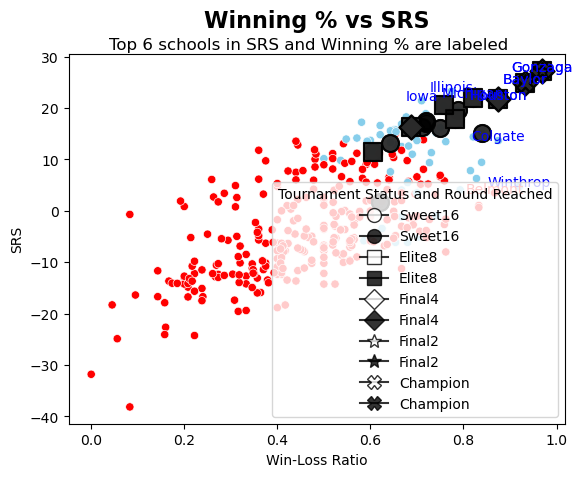

In [19]:
# Select the rows where 'SOS' and 'W-L%' are not NaN and sort by 'SOS' and 'W-L%'
sorted_sos = df[['SRS', 'W-L%', 'School', 'Tournament']].dropna().sort_values('SRS', ascending=False).iloc[:6]
sorted_wl = df[['SRS', 'W-L%', 'School', 'Tournament']].dropna().sort_values('W-L%', ascending=False).iloc[:6]

# Create the scatterplot
sns.scatterplot(x='W-L%', y='SRS', hue='Tournament', data=df, palette=['skyblue', 'red'])

# Add markers for Sweet16, Elite8, Final4, Final2, and Champion
markers = {'Sweet16': 'o', 'Elite8': 's', 'Final4': 'D', 'Final2': '*', 'Champion': 'X'}
colors = {'Yes': 'white', 'No': 'black'}
for marker_label, marker_style in markers.items():
    for color_label, color_code in colors.items():
        mask = (df['Tournament'] == 'Yes') & (df[marker_label] == 'Yes')
        data = df[mask]
        plt.scatter(data['W-L%'], data['SRS'], marker=marker_style, s=150, edgecolors='black', linewidths=1.5,
                    facecolors=color_code, alpha=0.8)

# Add the top and bottom 3 labels
for i, row in sorted_sos.iterrows():
    color = 'blue' if row['Tournament'] == 'Yes' else 'red'
    plt.text(row['W-L%'], row['SRS'], row['School'], ha='center', fontsize=10, color=color)
    
for i, row in sorted_wl.iterrows():
    color = 'blue' if row['Tournament'] == 'Yes' else 'red'
    plt.text(row['W-L%'], row['SRS'], row['School'], ha='center', fontsize=10, color=color)

# Add axis labels and title
plt.xlabel('Win-Loss Ratio')
plt.ylabel('SRS')
plt.suptitle('Top 6 schools in SRS and Winning % are labeled', y=.915)
plt.title('Winning % vs SRS', fontsize=16, fontweight='bold', y=1.05)

# Add legend
legend_elements = [Line2D([0], [0], marker=marker_style, color='black', label=marker_label, markersize=10,
                           markerfacecolor=color_code, alpha=0.8)
                   for marker_label, marker_style in markers.items()
                   for color_label, color_code in colors.items()]
plt.legend(handles=legend_elements, title='Tournament Status and Round Reached', loc='lower right')
### ?
def create_legend():
    # Create custom legend with markers and labels for each round
    legend_elements = []
    for round_name, round_color in ROUND_COLORS.items():
        # Only add legend element if there are any schools in the given round
        if df[df[round_name] == 'Yes'].shape[0] > 0:
            legend_elements.append(Line2D([0], [0], marker='o', color='w', label=round_name,
                                          markerfacecolor=round_color, markersize=10))
    # Add legend element for 'Tournament = Yes'
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Tournament = Yes',
                                   markerfacecolor='skyblue', markersize=10))
    # Add legend element for 'Tournament = No'
    legend_elements.append(Line2D([0], [0], marker='^', color='w', label='Tournament = No',
                                   markerfacecolor='red', markersize=10))
    # Add legend to plot
    plt.legend(handles=legend_elements, loc='best')


In [24]:
import matplotlib.pyplot as plt
import pandas as pd

a

# create a dictionary to map Yes and No to colors
color_map = {'Yes': 'green', 'No': 'red'}

# create a scatter plot
fig, ax = plt.subplots()
for col in df.columns[2:]:
    ax.scatter(df['SRS'], df['W-L%'], c=df[col].map(color_map), label=col)
    
# set axis labels and title
ax.set_xlabel('SRS')
ax.set_ylabel('W-L%')
ax.set_title('Scatter plot of SRS and W-L% colored by tournament status')

# add legend
ax.legend()

# show the plot
plt.show()


KeyError: 'Sweet16,Elite8,Final4,Final2,Champion'

In [ ]:
list(df.columns)